<a href="https://colab.research.google.com/github/gouthamans14/Blueberry-Prediction/blob/master/Bacterial_Species_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np

#Pandas

import pandas as pd
pd.set_option("display.max_columns",999)
pd.set_option("display.max_rows",999)

#Plots

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

#Warnings

import warnings
warnings.filterwarnings('ignore')


#SKlearn 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Explainable AI
#import shap


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the Datasets

In [3]:
train = pd.read_csv("/content/drive/MyDrive/Bacteria Dataset/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Bacteria Dataset/test.csv")
target = pd.read_csv("/content/drive/MyDrive/Bacteria Dataset/target.csv")


In [4]:
test_df = pd.merge(test,target,how="left", on="row_id")

In [5]:
test_df.shape

(100000, 288)

In [6]:
train.shape

(200000, 288)

In [7]:
y_test=test_df["target"]
test_df.drop(columns="target",inplace=True)

## EDA

In [8]:
train.head()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,A0T0G10C0,A0T1G0C9,A0T1G1C8,A0T1G2C7,A0T1G3C6,A0T1G4C5,A0T1G5C4,A0T1G6C3,A0T1G7C2,A0T1G8C1,A0T1G9C0,A0T2G0C8,A0T2G1C7,A0T2G2C6,A0T2G3C5,A0T2G4C4,A0T2G5C3,A0T2G6C2,A0T2G7C1,A0T2G8C0,A0T3G0C7,A0T3G1C6,A0T3G2C5,A0T3G3C4,A0T3G4C3,A0T3G5C2,A0T3G6C1,A0T3G7C0,A0T4G0C6,A0T4G1C5,A0T4G2C4,A0T4G3C3,A0T4G4C2,A0T4G5C1,A0T4G6C0,A0T5G0C5,A0T5G1C4,A0T5G2C3,A0T5G3C2,A0T5G4C1,A0T5G5C0,A0T6G0C4,A0T6G1C3,A0T6G2C2,A0T6G3C1,A0T6G4C0,A0T7G0C3,A0T7G1C2,A0T7G2C1,A0T7G3C0,A0T8G0C2,A0T8G1C1,A0T8G2C0,A0T9G0C1,A0T9G1C0,A0T10G0C0,A1T0G0C9,A1T0G1C8,A1T0G2C7,A1T0G3C6,A1T0G4C5,A1T0G5C4,A1T0G6C3,A1T0G7C2,A1T0G8C1,A1T0G9C0,A1T1G0C8,A1T1G1C7,A1T1G2C6,A1T1G3C5,A1T1G4C4,A1T1G5C3,A1T1G6C2,A1T1G7C1,A1T1G8C0,A1T2G0C7,A1T2G1C6,A1T2G2C5,A1T2G3C4,A1T2G4C3,A1T2G5C2,A1T2G6C1,A1T2G7C0,A1T3G0C6,A1T3G1C5,A1T3G2C4,A1T3G3C3,A1T3G4C2,A1T3G5C1,A1T3G6C0,A1T4G0C5,A1T4G1C4,A1T4G2C3,A1T4G3C2,A1T4G4C1,A1T4G5C0,A1T5G0C4,A1T5G1C3,A1T5G2C2,A1T5G3C1,A1T5G4C0,A1T6G0C3,A1T6G1C2,A1T6G2C1,A1T6G3C0,A1T7G0C2,A1T7G1C1,A1T7G2C0,A1T8G0C1,A1T8G1C0,A1T9G0C0,A2T0G0C8,A2T0G1C7,A2T0G2C6,A2T0G3C5,A2T0G4C4,A2T0G5C3,A2T0G6C2,A2T0G7C1,A2T0G8C0,A2T1G0C7,A2T1G1C6,A2T1G2C5,A2T1G3C4,A2T1G4C3,A2T1G5C2,A2T1G6C1,A2T1G7C0,A2T2G0C6,A2T2G1C5,A2T2G2C4,A2T2G3C3,A2T2G4C2,A2T2G5C1,A2T2G6C0,A2T3G0C5,A2T3G1C4,A2T3G2C3,A2T3G3C2,A2T3G4C1,A2T3G5C0,A2T4G0C4,A2T4G1C3,A2T4G2C2,A2T4G3C1,A2T4G4C0,A2T5G0C3,A2T5G1C2,A2T5G2C1,A2T5G3C0,A2T6G0C2,A2T6G1C1,A2T6G2C0,A2T7G0C1,A2T7G1C0,A2T8G0C0,A3T0G0C7,A3T0G1C6,A3T0G2C5,A3T0G3C4,A3T0G4C3,A3T0G5C2,A3T0G6C1,A3T0G7C0,A3T1G0C6,A3T1G1C5,A3T1G2C4,A3T1G3C3,A3T1G4C2,A3T1G5C1,A3T1G6C0,A3T2G0C5,A3T2G1C4,A3T2G2C3,A3T2G3C2,A3T2G4C1,A3T2G5C0,A3T3G0C4,A3T3G1C3,A3T3G2C2,A3T3G3C1,A3T3G4C0,A3T4G0C3,A3T4G1C2,A3T4G2C1,A3T4G3C0,A3T5G0C2,A3T5G1C1,A3T5G2C0,A3T6G0C1,A3T6G1C0,A3T7G0C0,A4T0G0C6,A4T0G1C5,A4T0G2C4,A4T0G3C3,A4T0G4C2,A4T0G5C1,A4T0G6C0,A4T1G0C5,A4T1G1C4,A4T1G2C3,A4T1G3C2,A4T1G4C1,A4T1G5C0,A4T2G0C4,A4T2G1C3,A4T2G2C2,A4T2G3C1,A4T2G4C0,A4T3G0C3,A4T3G1C2,A4T3G2C1,A4T3G3C0,A4T4G0C2,A4T4G1C1,A4T4G2C0,A4T5G0C1,A4T5G1C0,A4T6G0C0,A5T0G0C5,A5T0G1C4,A5T0G2C3,A5T0G3C2,A5T0G4C1,A5T0G5C0,A5T1G0C4,A5T1G1C3,A5T1G2C2,A5T1G3C1,A5T1G4C0,A5T2G0C3,A5T2G1C2,A5T2G2C1,A5T2G3C0,A5T3G0C2,A5T3G1C1,A5T3G2C0,A5T4G0C1,A5T4G1C0,A5T5G0C0,A6T0G0C4,A6T0G1C3,A6T0G2C2,A6T0G3C1,A6T0G4C0,A6T1G0C3,A6T1G1C2,A6T1G2C1,A6T1G3C0,A6T2G0C2,A6T2G1C1,A6T2G2C0,A6T3G0C1,A6T3G1C0,A6T4G0C0,A7T0G0C3,A7T0G1C2,A7T0G2C1,A7T0G3C0,A7T1G0C2,A7T1G1C1,A7T1G2C0,A7T2G0C1,A7T2G1C0,A7T3G0C0,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,-9.536743e-07,-0.000010,-8.583069e-05,-0.000343,-0.000801,-0.001202,-0.001202,-0.000801,-0.000343,-0.000086,-0.000010,-4.291534e-05,-0.000343,-0.001202,-0.002403,-0.003004,-0.002403,-0.001202,-0.000343,-0.000043,-0.000114,-0.000801,-0.002403,-0.004005,-0.004005,-0.002403,-0.000801,-0.000114,-0.000200,-0.001202,-0.003004,-0.004005,-0.003004,-0.001202,-0.000200,-0.000240,-0.001202,-0.002403,-0.002403,-0.001202,-0.000240,-0.000200,-0.000801,-0.001202,-0.000801,-0.000200,-0.000114,-0.000343,-0.000343,-0.000114,-0.000043,-0.000086,-0.000043,-0.000010,-0.000010,-9.536743e-07,-9.536743e-06,-0.000086,-0.000343,-0.000801,-0.001202,-0.001202,-0.000801,-0.000343,-0.000086,-0.000010,-0.000086,-0.000687,-0.002403,-0.004807,-0.006008,-0.004807,-0.002403,-0.000687,-0.000086,-0.000343,-0.002403,-0.007210,-0.002016,-0.012016,-0.007210,0.017597,0.009657,-0.000801,-0.004807,0.007984,-0.006022,0.007984,-0.004807,-0.000801,-0.001202,0.003992,-0.012016,-0.012016,0.003992,0.008798,-0.001202,-0.004807,0.002790,-0.004807,-0.001202,-0.000801,0.007597,0.007597,-0.000801,-0.000343,-0.000687,-0.000343,-0.000086,-0.000086,-0.000010,-0.000043,-0.000343,-0.001202,-0.002403,-0.003004,-0.002403,-0.001202,-0.000343,-0.000043,-0.000343,-0.002403,-0.007210,-0.012016,-0.002016,-0.007210,-0.002403,-0.000343,0.008798,

In [9]:
train.drop(columns=["row_id"],inplace=True)
test_df.drop(columns=["row_id"],inplace=True)

In [10]:
train.shape

(200000, 287)

In [11]:
test_df.shape

(100000, 286)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 287 entries, A0T0G0C10 to target
dtypes: float64(286), object(1)
memory usage: 437.9+ MB


### Missing ValueS

In [13]:
train.isna().sum().sum()

0

In [14]:
test.isna().sum().sum()

0

In [ ]:
#unpivot = pd.melt(frame=train,value_vars=train.describe().columns[:])
#g = sns.FacetGrid(unpivot, col = "variable",col_wrap=3, sharex=False, sharey=False)
#g.map(sns.kdeplot,"value")
#plt.show()

### Checking for duplicates

In [15]:
train.duplicated().sum()


76007

In [16]:
test.duplicated().sum()

0

In [17]:
train.drop_duplicates(keep="first",inplace=True)

In [18]:
train.shape

(123993, 287)

In [19]:
y_train = train["target"]

train.drop(columns='target',inplace=True)

In [20]:
train.shape

(123993, 286)

In [21]:
test_df.shape

(100000, 286)

In [22]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(train)

StandardScaler()

In [39]:
test_df.columns

Index(['A0T0G0C10', 'A0T0G1C9', 'A0T0G2C8', 'A0T0G3C7', 'A0T0G4C6', 'A0T0G5C5',
       'A0T0G6C4', 'A0T0G7C3', 'A0T0G8C2', 'A0T0G9C1',
       ...
       'A8T0G0C2', 'A8T0G1C1', 'A8T0G2C0', 'A8T1G0C1', 'A8T1G1C0', 'A8T2G0C0',
       'A9T0G0C1', 'A9T0G1C0', 'A9T1G0C0', 'A10T0G0C0'],
      dtype='object', length=286)

In [23]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test_df)
scaled_train.shape

(123993, 286)

In [24]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_train)

PCA()

In [25]:
pca_train = pca.transform(scaled_train)

In [ ]:
#plt.figure(figsize=(30,10))
#
#plt.bar(x=range(1, len(per_var)+1),height =per_var,tick_label =labels)
#plt.ylabel("Percentage of Explained Variance")
#plt.xlabel("Principal Component")
#plt.title("ScreePlot")
#plt.show()

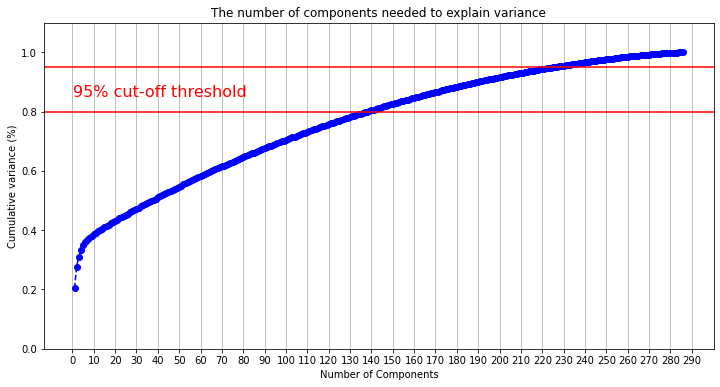

In [26]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 287, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 300, step=10)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')

plt.axhline(y=0.8, color='r', linestyle='-')

plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

#### Choosing number of components as 150

In [27]:
pca_220=PCA(n_components=220)

In [28]:
train_pca = pca_220.fit_transform(scaled_train)

In [29]:
test_pca = pca_220.transform(scaled_test)

In [30]:
train_pca.shape

(123993, 220)

In [31]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
trainY = encoder.fit_transform(y_train)


In [32]:
target

,row_id,target
0,200000,Escherichia_fergusonii
1,200001,Salmonella_enterica
2,200002,Enterococcus_hirae
3,200003,Salmonella_enterica
4,200004,Staphylococcus_aureus
...,...,...
99995,299995,Streptococcus_pneumoniae
99996,299996,Bacteroides_fragilis
99997,299997,Bacteroides_fragilis
99998,299998,Bacteroides_fragilis


In [33]:
testY = encoder.transform(y_test)

In [34]:
encoder.classes_

array(['Bacteroides_fragilis', 'Campylobacter_jejuni',
       'Enterococcus_hirae', 'Escherichia_coli', 'Escherichia_fergusonii',
       'Klebsiella_pneumoniae', 'Salmonella_enterica',
       'Staphylococcus_aureus', 'Streptococcus_pneumoniae',
       'Streptococcus_pyogenes'], dtype=object)

In [35]:
integer_mapping = {l: i for i, l in enumerate(encoder.classes_)}

In [36]:
integer_mapping

{'Bacteroides_fragilis': 0,
 'Campylobacter_jejuni': 1,
 'Enterococcus_hirae': 2,
 'Escherichia_coli': 3,
 'Escherichia_fergusonii': 4,
 'Klebsiella_pneumoniae': 5,
 'Salmonella_enterica': 6,
 'Staphylococcus_aureus': 7,
 'Streptococcus_pneumoniae': 8,
 'Streptococcus_pyogenes': 9}

In [37]:
test_pca.shape

(100000, 220)

In [38]:
train_pca.shape

(123993, 220)

### Baseline Modeling

#### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr_pca = LogisticRegression(multi_class="multinomial")
lr_normal =LogisticRegression(multi_class="multinomial")


In [44]:
lr_pca.fit(train_pca,trainY)
lr_normal.fit(scaled_train,trainY)

LogisticRegression(multi_class='multinomial')

In [53]:
y_pred_pca= lr_pca.predict(test_pca)
y_pred = lr_normal.predict(scaled_test)

In [54]:
from sklearn.metrics import accuracy_score

print(" PCA Accuracy:{}" .format(accuracy_score(y_pred_pca,testY)))
print("Accuracy: {} " .format(accuracy_score(y_pred,testY)))

 PCA Accuracy:0.80726
Accuracy: 0.81067 


#### XG Boost Classifier

In [61]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective="multi:softmax",num_class= 10,n_jobs=-1)

In [62]:
xgb.fit(scaled_train,trainY)

XGBClassifier(n_jobs=-1, num_class=10, objective='multi:softprob')

In [63]:
y_pred = xgb.predict(scaled_test)
accuracy_score(y_pred,testY)

0.79074

#### Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(scaled_train,trainY)
y_pred = rfc.predict(scaled_test)
accuracy_score(y_pred,testY)

0.95359

In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(train_pca,trainY)
y_pred = rfc.predict(test_pca)
accuracy_score(y_pred,testY)

0.83583

#### WE can See XG Boost is doing good

In [ ]:
y_pred 

In [66]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [67]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective="multi:softmax",num_class= 10,n_jobs=-1,silent=True, nthread=1)

In [68]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 1001)

grid_search = GridSearchCV(xgb, param_grid=params,scoring='roc_auc', n_jobs=4, cv=skf.split(train_pca,trainY), verbose=3 )


In [ ]:
grid_search.fit(train_pca,trainY)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-69-790c3403e800>", line 1, in <module>
    grid_search.fit(train_pca,trainY)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py", line 891, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py", line 1392, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py", line 851, in evaluate_candidates
    enumerate(candidate_params), enumerate(cv.split(X, y, groups))
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1056, in __call__
    self.retrieve()
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 935, in retrieve
    self._ou

KeyboardInterrupt: ignored

In [57]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 11.8 MB/s 
     |████████████████████████████████| 81 kB 10.7 MB/s 
     |████████████████████████████████| 209 kB 67.6 MB/s 
     |████████████████████████████████| 78 kB 8.6 MB/s 
     |████████████████████████████████| 49 kB 7.7 MB/s 
     |████████████████████████████████| 112 kB 43.5 MB/s 
     |████████████████████████████████| 146 kB 67.4 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=19697aadf7fa669dfce311e2e0c19ccaf2ac14c45fcf7a19cf458ffb37157c04
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [58]:
import optuna

In [59]:
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [60]:
import xgboost as xgboost

In [61]:
dtrain = xgboost.DMatrix(train_pca,trainY)
dtest  = xgboost.DMatrix(test_pca,testY)

In [62]:
import re
def return_rmse(params):
    model = xgboost.train(params , dtrain, num_boost_round = 600, evals = [(dtest, 'eval')],
          early_stopping_rounds=20,verbose_eval = 0)
    result = model.eval(dtest)
    result = np.float(re.search(r'[\d.]+$',result).group(0))
    #print(result)
    return(result)

In [63]:
def objective(trial):
   
    param = {
#                 "n_estimators" : trial.suggest_int('n_estimators', 0, 500),
                'max_depth':trial.suggest_int('max_depth', 3, 5),
                'reg_alpha':trial.suggest_uniform('reg_alpha',0,6),
                'reg_lambda':trial.suggest_uniform('reg_lambda',0,2),
                'min_child_weight':trial.suggest_int('min_child_weight',0,5),
                'gamma':trial.suggest_uniform('gamma', 0, 4),
                'learning_rate':trial.suggest_loguniform('learning_rate',0.05,0.5),
                'colsample_bytree':trial.suggest_uniform('colsample_bytree',0.4,0.9),
                'subsample':trial.suggest_uniform('subsample',0.4,0.9),

                'nthread' : -1
            }
    return(return_rmse(param)) 

In [64]:
study1 = optuna.create_study(direction='minimize',sampler=TPESampler())
study1.optimize(objective, n_trials= 1,show_progress_bar =True)


[I 2022-06-05 12:05:06,812] A new study created in memory with name: no-name-0fad2b58-0329-4c6b-9818-4c907e3454fd


  0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'